# Multi_class Classification Iris Flowers Project :

# objective:Botanist wants to determine the species of an iris flower based on characteristics of that flower.For instance attributes including petal,petal width,sepal length,sepal width are "features" that determine the classification of a given iris flower.

# Preparation for data

We will start off by importing all of the classes and functions we will need. This includes both the functionality we require from Keras, but also data loading from pandas as well as data preparation and model evaluation from scikit-learn:

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical





Using TensorFlow backend.


# Loading the iris dataset  into scikit_learn

In [2]:
# import load_iris function from dataset module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing




In [3]:
# save bunch object containing iris_dataset and iris attributes
data_frame_iris  = load_iris()
type(data_frame_iris)

sklearn.utils.Bunch

In [4]:
# print the iris data
print(data_frame_iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Machine learning Termonolgy

 •	Each row is an observation is (also known as: samples, instance   ).
 
 •	Each column is a feature (also know as : predicator, attributes, input ,covariate).


In [5]:
# print the names of features
print(data_frame_iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the integers the species of each observation
print(data_frame_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# print encoding scheme for sepecies: 0 = "setosa", 1 = "versicolor", 2 = "virginica"
print(data_frame_iris.target_names)

['setosa' 'versicolor' 'virginica']


 •	Each  value we are predicting is the response (also known as: target ,outcomes,label,dependent variable).
 
 •	Classification is supervised learning in which the response is categorical.


In [8]:
# check the type of featurs and response
print(type(data_frame_iris.data))
print(type(data_frame_iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# check the shape of features and response
print(data_frame_iris.data.shape)
print(data_frame_iris.target.shape)

(150, 4)
(150,)


In [10]:
# store feature matrix in x
x =data_frame_iris["data"]
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
# store response matrix in y
y =to_categorical(data_frame_iris["target"])
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

# Training data  and Test data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
print(x_train)
len(x_train)

[[5.7 2.6 3.5 1. ]
 [6.  2.9 4.5 1.5]
 [5.  3.5 1.6 0.6]
 [5.3 3.7 1.5 0.2]
 [6.5 3.2 5.1 2. ]
 [5.  3.5 1.3 0.3]
 [5.1 2.5 3.  1.1]
 [6.1 2.8 4.7 1.2]
 [5.1 3.3 1.7 0.5]
 [5.  3.  1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.7 3.8 1.7 0.3]
 [4.5 2.3 1.3 0.3]
 [5.  3.2 1.2 0.2]
 [4.4 3.  1.3 0.2]
 [6.6 2.9 4.6 1.3]
 [6.1 3.  4.6 1.4]
 [5.4 3.4 1.5 0.4]
 [4.6 3.2 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [4.4 2.9 1.4 0.2]
 [6.7 3.3 5.7 2.5]
 [4.7 3.2 1.6 0.2]
 [5.  3.3 1.4 0.2]
 [5.9 3.  4.2 1.5]
 [4.9 3.  1.4 0.2]
 [5.8 2.7 4.1 1. ]
 [5.8 4.  1.2 0.2]
 [6.9 3.1 4.9 1.5]
 [6.2 2.8 4.8 1.8]
 [6.3 3.4 5.6 2.4]
 [6.5 3.  5.8 2.2]
 [5.8 2.8 5.1 2.4]
 [4.8 3.1 1.6 0.2]
 [6.3 3.3 6.  2.5]
 [5.7 2.8 4.5 1.3]
 [7.9 3.8 6.4 2. ]
 [7.3 2.9 6.3 1.8]
 [6.8 3.  5.5 2.1]
 [6.1 2.8 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [6.4 3.1 5.5 1.8]
 [7.2 3.6 6.1 2.5]
 [7.4 2.8 6.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.8 4.9 2. ]
 [7.7 2.8 6.7 2. ]
 [5.8 2.6 4.  1.2]
 [6.5 3.  5.2 2. ]
 [5.5 2.3 4.  1.3]
 [6.  3.  4.

105

In [14]:
print(x_test)
len(x_test)

[[5.7 4.4 1.5 0.4]
 [6.8 3.2 5.9 2.3]
 [5.6 3.  4.5 1.5]
 [7.7 3.  6.1 2.3]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.6 5.6 1.4]
 [5.1 3.7 1.5 0.4]
 [5.4 3.4 1.7 0.2]
 [5.4 3.9 1.3 0.4]
 [6.  2.2 4.  1. ]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 3.9 1.2]
 [6.4 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [6.6 3.  4.4 1.4]
 [6.4 2.8 5.6 2.1]
 [5.4 3.9 1.7 0.4]
 [4.8 3.  1.4 0.3]
 [7.7 2.6 6.9 2.3]
 [5.5 3.5 1.3 0.2]
 [6.3 2.9 5.6 1.8]
 [5.5 2.4 3.7 1. ]
 [6.  2.2 5.  1.5]
 [5.5 4.2 1.4 0.2]
 [6.9 3.1 5.1 2.3]
 [7.  3.2 4.7 1.4]
 [6.5 2.8 4.6 1.5]
 [6.4 2.8 5.6 2.2]
 [5.  2.  3.5 1. ]
 [6.3 2.5 5.  1.9]
 [6.9 3.1 5.4 2.1]
 [5.5 2.4 3.8 1.1]
 [5.1 3.5 1.4 0.2]
 [5.2 3.4 1.4 0.2]
 [5.5 2.5 4.  1.3]
 [5.6 2.9 3.6 1.3]
 [5.9 3.  5.1 1.8]
 [4.3 3.  1.1 0.1]
 [4.6 3.6 1.  0.2]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [4.9 2.4 3.3 1. ]
 [6.3 2.3 4.4 1.3]]


45

In [15]:
print(y_train)
len(y_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

105

In [16]:
print(y_test)
len(y_test)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


45

# Building Network

In [18]:
# model

model = models.Sequential()
model.add(layers.Dense(6,input_dim = 4 ,activation = "relu"))
model.add(layers.Dense(3,activation = "softmax"))

# Compiling the model

In [21]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Fitting the model

In [22]:
 history = model.fit(x_train , y_train, validation_data = (x_test ,y_test),epochs=200 , batch_size=10)


W0713 00:02:01.669674  6380 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 00:02:01.810619  6380 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 4ms/step - loss: 2.6989 - acc: 0.3619 - val_loss: 2.7058 - val_acc: 0.2667
Epoch 2/200
105/105 [==============================] - 0s 465us/step - loss: 2.3022 - acc: 0.3619 - val_loss: 2.3727 - val_acc: 0.2667
Epoch 3/200
105/105 [==============================] - 0s 513us/step - loss: 2.0351 - acc: 0.3619 - val_loss: 2.1137 - val_acc: 0.2667
Epoch 4/200
105/105 [==============================] - 0s 579us/step - loss: 1.8216 - acc: 0.3619 - val_loss: 1.9034 - val_acc: 0.2667
Epoch 5/200
105/105 [==============================] - 0s 531us/step - loss: 1.6470 - acc: 0.3619 - val_loss: 1.7226 - val_acc: 0.2667
Epoch 6/200
105/105 [==============================] - 0s 466us/step - loss: 1.4976 - acc: 0.3619 - val_loss: 1.5751 - val_acc: 0.2667
Epoch 7/200
105/105 [==============================] - 0s 690us/step - loss: 1.3745 - acc: 0.3619 - val_loss: 1.4503 - val_acc: 0.2667
Epoch 8/200


Epoch 61/200
105/105 [==============================] - 0s 247us/step - loss: 0.3979 - acc: 0.9619 - val_loss: 0.4253 - val_acc: 0.9556
Epoch 62/200
105/105 [==============================] - 0s 247us/step - loss: 0.3947 - acc: 0.9619 - val_loss: 0.4205 - val_acc: 0.9556
Epoch 63/200
105/105 [==============================] - 0s 275us/step - loss: 0.3888 - acc: 0.9619 - val_loss: 0.4139 - val_acc: 0.9556
Epoch 64/200
105/105 [==============================] - 0s 263us/step - loss: 0.3846 - acc: 0.9619 - val_loss: 0.4096 - val_acc: 0.9556
Epoch 65/200
105/105 [==============================] - 0s 235us/step - loss: 0.3800 - acc: 0.9619 - val_loss: 0.4060 - val_acc: 0.9556
Epoch 66/200
105/105 [==============================] - 0s 266us/step - loss: 0.3767 - acc: 0.9429 - val_loss: 0.3978 - val_acc: 0.9556
Epoch 67/200
105/105 [==============================] - 0s 408us/step - loss: 0.3712 - acc: 0.9619 - val_loss: 0.3942 - val_acc: 0.9556
Epoch 68/200
105/105 [==========================

Epoch 121/200
105/105 [==============================] - 0s 190us/step - loss: 0.2453 - acc: 0.9619 - val_loss: 0.2474 - val_acc: 0.9556
Epoch 122/200
105/105 [==============================] - 0s 190us/step - loss: 0.2445 - acc: 0.9619 - val_loss: 0.2460 - val_acc: 0.9556
Epoch 123/200
105/105 [==============================] - 0s 211us/step - loss: 0.2422 - acc: 0.9619 - val_loss: 0.2453 - val_acc: 0.9778
Epoch 124/200
105/105 [==============================] - 0s 237us/step - loss: 0.2406 - acc: 0.9619 - val_loss: 0.2430 - val_acc: 0.9556
Epoch 125/200
105/105 [==============================] - 0s 324us/step - loss: 0.2392 - acc: 0.9619 - val_loss: 0.2418 - val_acc: 0.9778
Epoch 126/200
105/105 [==============================] - 0s 247us/step - loss: 0.2376 - acc: 0.9619 - val_loss: 0.2414 - val_acc: 0.9778
Epoch 127/200
105/105 [==============================] - 0s 250us/step - loss: 0.2378 - acc: 0.9619 - val_loss: 0.2401 - val_acc: 0.9778
Epoch 128/200
105/105 [==================

Epoch 181/200
105/105 [==============================] - 0s 228us/step - loss: 0.1793 - acc: 0.9619 - val_loss: 0.1716 - val_acc: 0.9778
Epoch 182/200
105/105 [==============================] - 0s 218us/step - loss: 0.1782 - acc: 0.9619 - val_loss: 0.1706 - val_acc: 0.9778
Epoch 183/200
105/105 [==============================] - 0s 228us/step - loss: 0.1792 - acc: 0.9619 - val_loss: 0.1699 - val_acc: 0.9778
Epoch 184/200
105/105 [==============================] - 0s 247us/step - loss: 0.1780 - acc: 0.9524 - val_loss: 0.1683 - val_acc: 0.9778
Epoch 185/200
105/105 [==============================] - 0s 228us/step - loss: 0.1761 - acc: 0.9619 - val_loss: 0.1676 - val_acc: 0.9778
Epoch 186/200
105/105 [==============================] - 0s 209us/step - loss: 0.1753 - acc: 0.9619 - val_loss: 0.1665 - val_acc: 0.9778
Epoch 187/200
105/105 [==============================] - 0s 190us/step - loss: 0.1743 - acc: 0.9619 - val_loss: 0.1656 - val_acc: 0.9778
Epoch 188/200
105/105 [==================

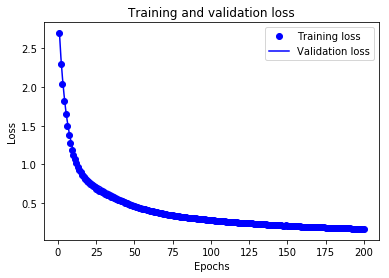

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

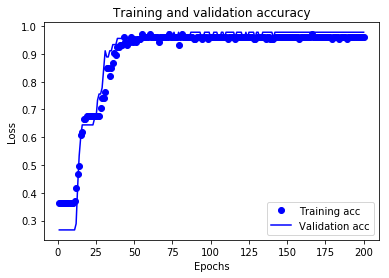

In [24]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

45/45 [==============================] - 0s 176us/step
test_acc: 0.9777777777777777
